In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [188]:
sns.set(rc={'figure.figsize':(16,10)})
plt.style.use('seaborn-whitegrid')

In [189]:
year = '12'
model = 'model_old'

In [190]:
data = pd.read_csv(f'../outputs/{year}/tables/signal_table{year}.csv', index_col='name')
triggers = pd.read_csv(f'../outputs/{year}/tables/triggers{year}.csv', index_col='name')
reg_eff = pd.read_csv(f'../outputs/{model}/tables/signal_table{model}.csv', index_col='name')

In [191]:
data

,lum,dEmin,dEmax,Emean,Nsig,dNsig
name,,,,,,
640,720.30,0.00,0.00,638.53,95.04,10.26
680,843.29,0.00,0.00,678.27,70.00,8.37
720,915.81,0.00,0.00,717.46,53.00,7.28
760,835.30,0.00,0.00,757.30,73.25,10.51
800,824.54,0.00,0.00,797.50,111.04,11.67
840,881.08,0.00,0.00,837.05,90.88,10.66
860,807.39,0.00,0.00,857.92,28.86,5.83
880,964.90,0.00,0.00,878.86,14.05,3.93
960,6550.54,49.51,45.72,948.52,36.73,7.36


Triggers

In [192]:
triggers.tail()

,TF,CF,TC,eTF,eCF,TrigEff,vTF,vCF,TrigErr
name,,,,,,,,,
800,67.0,2.0,47.0,0.9412,0.4138,0.9655,0.0326,0.0455,0.0193
840,53.0,2.0,41.0,0.9333,0.4375,0.9625,0.0368,0.0504,0.0210
860,17.0,4.0,13.0,0.7368,0.4375,0.8520,0.0985,0.0864,0.0599
880,9.0,0.0,8.0,0.9000,0.4737,0.9474,0.0905,0.1116,0.0489
960,34.0,10.0,26.0,0.7105,0.4355,0.8366,0.0726,0.0625,0.0448


In [193]:
reg_eff.head()

,lum,dEmin,dEmax,Emean,Nsig,dNsig
name,,,,,,
550.0,7163,0.0,0.0,550.0,1815.55,45.10
562.5,6306,0.0,0.0,562.5,1557.16,41.22
575.0,5516,0.0,0.0,575.0,1360.09,40.02
587.5,5116,0.0,0.0,587.5,1250.34,36.69
600.0,4606,0.0,0.0,600.0,1085.48,34.69


Get N/L

In [194]:
data['CSvis'] = data['Nsig']/data['lum']
data['dCSvis'] = data['dNsig']/data['lum']

In [195]:
data.shape

(9, 8)

Trigger join

In [196]:
data = data.join(triggers[['TrigEff', 'TrigErr']], how='left')

In [197]:
data.shape #сверить с предыдущим shape

(9, 10)

In [198]:
data = data.drop(['Nsig', 'dNsig', 'lum'], axis=1)

Get Reg_eff

In [199]:
reg_eff['RegEff'] = reg_eff['Nsig']/reg_eff['lum']
reg_eff['RegErr'] = reg_eff['dNsig']/reg_eff['lum']
reg_eff.drop(['dEmax', 'dEmin', 'lum', 'Nsig', 'dNsig'], axis=1, inplace=True)

Reg eff join

In [200]:
data['RegEff'] = data.apply(lambda x: np.interp(x['Emean'], reg_eff.Emean, reg_eff.RegEff), axis=1)
data['RegErr'] = data.apply(lambda x: np.interp(x['Emean'], reg_eff.Emean, reg_eff.RegErr), axis=1)

Recalc cross section

In [201]:
data['CS'] = data['CSvis']/data['TrigEff']/data['RegEff'];
data['dCS'] = data['CS']*np.sqrt( np.square( data['dCSvis']/data['CSvis'] ) + 
                                np.square( data['TrigErr']/data['TrigEff'] ) + 
                                np.square( data['RegErr']/data['RegEff'] ))

In [202]:
#data.drop(['CSvis', 'dCSvis', 'TrigEff', 'TrigErr', 'RegEff', 'RegErr'], axis=1, inplace=True)

In [203]:
data.to_csv(f'../outputs/{year}/tables/result_visible.csv', float_format='%.5f')

## Draw cross sections

In [204]:
cs11 = pd.read_csv('../outputs/11/tables/result_visible.csv', index_col=['name'])
cs12 = pd.read_csv('../outputs/12/tables/result_visible.csv', index_col=['name'])
cs17 = pd.read_csv('../outputs/17/tables/result_visible.csv', index_col=['name'])
cs19 = pd.read_csv('../outputs/19/tables/result_visible.csv', index_col=['name'])

In [205]:
#radcor = pd.read_csv('rad_cors.dat', delimiter='\t', names=['energy', 'radcor'], index_col=['energy'])
radcor = pd.read_csv('../outputs/radcors.dat', names=['energy', 'radcor'], index_col=['energy'])
radcor.index *= 0.5e3
radcor = radcor.sort_index()

In [206]:
cs11.tail()

,dEmin,dEmax,Emean,CSvis,dCSvis,TrigEff,TrigErr,RegEff,RegErr,CS,dCS
name,,,,,,,,,,,
850.0,0.00,0.00,846.43,0.04494,0.00985,0.99,0.01,0.13553,0.00327,0.33492,0.07396
862.5,0.00,0.00,861.56,0.03177,0.00938,0.96,0.04,0.12411,0.00309,0.26664,0.07981
880.0,8.15,7.89,878.97,0.01306,0.00381,0.95,0.05,0.11592,0.00334,0.11855,0.03530
910.0,14.83,13.04,911.28,0.01206,0.00317,0.93,0.05,0.10074,0.00359,0.12877,0.03482
950.0,28.82,37.90,964.41,0.00317,0.00116,0.91,0.06,0.06182,0.00383,0.05634,0.02129


In [207]:
radcor.head()

,radcor
energy,
550.0,0.771060
562.5,0.778335
575.0,0.784576
587.5,0.790510
600.0,0.796090


In [208]:
cs11['rad'] = np.interp(cs11.Emean, radcor.index, radcor.radcor)
cs12['rad'] = np.interp(cs12.Emean, radcor.index, radcor.radcor)
cs17['rad'] = np.interp(cs17.Emean, radcor.index, radcor.radcor)
cs19['rad'] = np.interp(cs19.Emean, radcor.index, radcor.radcor)

In [209]:
def born(data):
    data['born'] = data.CS/data.rad
    data['born_err'] = data.dCS/data.rad

In [210]:
born(cs11)
born(cs12)
born(cs17)
born(cs19)

In [211]:
errE = dict()
errE[11] = [cs11.dEmin*2e-3, cs11.dEmax*2e-3]
errE[12] = [cs12.dEmin*2e-3, cs12.dEmax*2e-3]
errE[17] = [cs17.dEmin*2e-3, cs17.dEmax*2e-3]
errE[19] = [cs19.dEmin*2e-3, cs19.dEmax*2e-3]

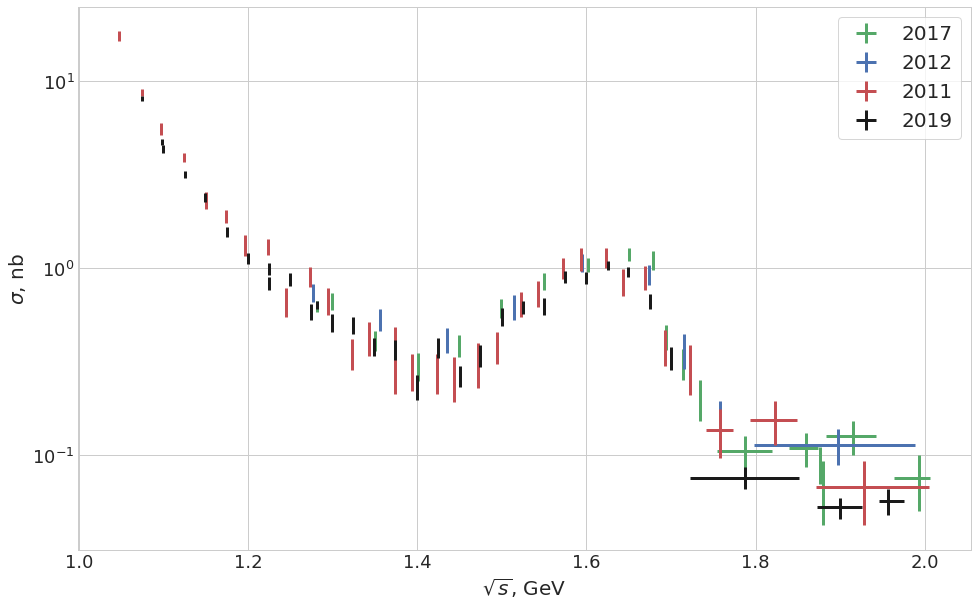

In [213]:
plt.errorbar(cs17.Emean*2e-3, cs17.born/0.981, yerr=cs17.born_err, xerr=errE[17], fmt='g^', elinewidth=3, ms=0, label='2017')
plt.errorbar(cs12.Emean*2e-3, cs12.born, yerr=cs12.born_err, xerr=errE[12], fmt='bp', elinewidth=3, ms=0, label='2012')
plt.errorbar(cs11.Emean*2e-3, cs11.born/0.993, yerr=cs11.born_err, xerr=errE[11], fmt='rv', elinewidth=3, ms=0, label='2011')
plt.errorbar(cs19.Emean*2e-3, cs19.born/0.995, yerr=cs19.born_err, xerr=errE[19], fmt='kd', elinewidth=3, ms=0, label='2019')
plt.yscale('log')
plt.xlabel('$\sqrt{s}$, GeV', fontsize=20)
plt.ylabel('$\sigma$, nb', fontsize=20)
ax = plt.gca()
ax.tick_params(labelsize=18)
ax.legend(fontsize=20, frameon=True)
#plt.savefig('cs.pdf')

### Некоторые проверки

1. Проверить `RegEff`
2. Проверить видимое сечение
3. Проверить триггеры

<ErrorbarContainer object of 3 artists>

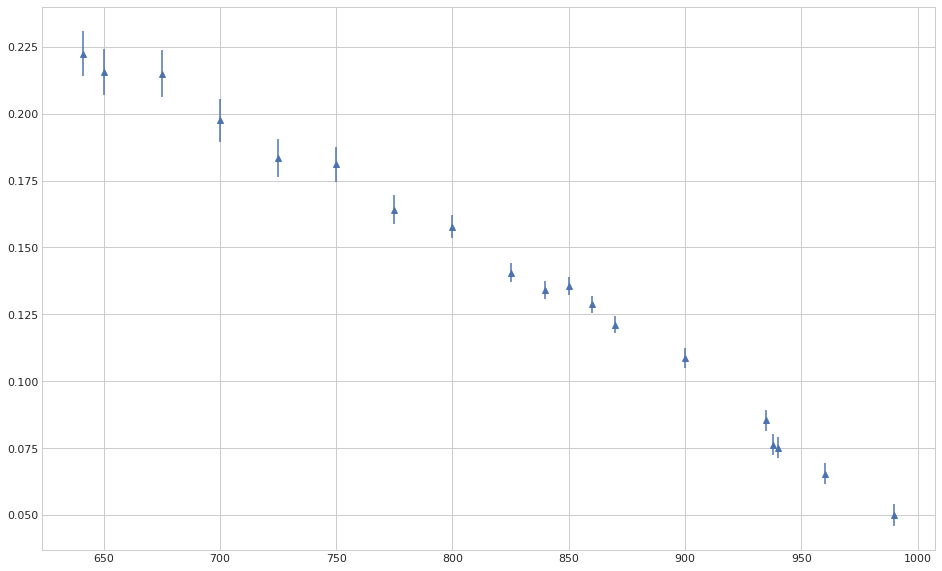

In [109]:
plt.errorbar(data=cs17, x=cs17.index, y='RegEff', yerr='RegErr', fmt='^')

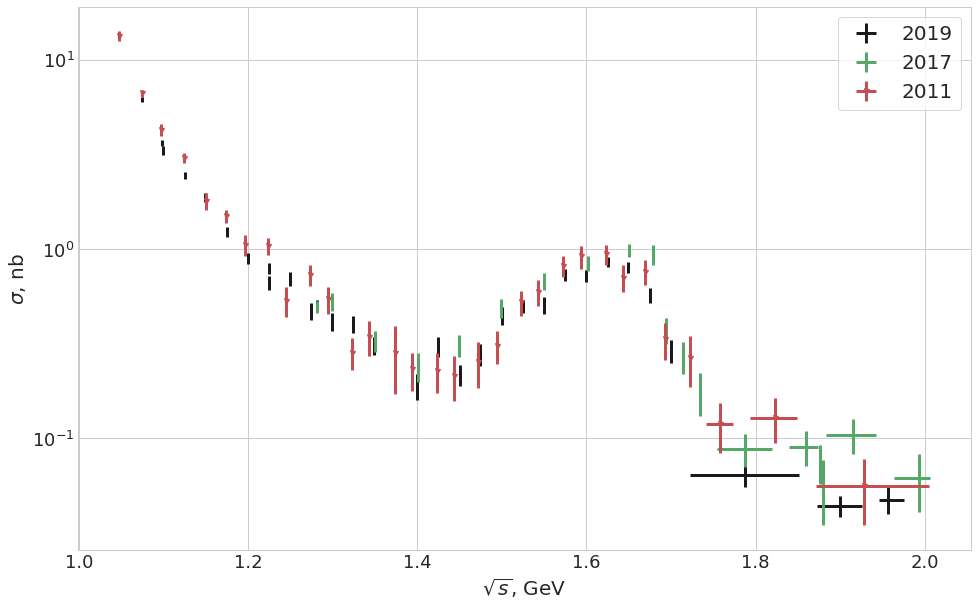

In [144]:
plt.errorbar(cs19.Emean*2e-3, cs19.CS, yerr=cs19.dCS, xerr=errE[19], fmt='kd', elinewidth=3, ms=0, label='2019')
plt.errorbar(cs17.Emean*2e-3, cs17.CS, yerr=cs17.dCS, xerr=errE[17], fmt='g^', elinewidth=3, ms=0, label='2017')
# plt.errorbar(cs12.Emean*2e-3, cs12.CS, yerr=cs12.dCS, xerr=errE[12], fmt='bp', elinewidth=3, ms=5, label='2012')
plt.errorbar(cs11.Emean*2e-3, cs11.CS, yerr=cs11.dCS, xerr=errE[11], fmt='rv', elinewidth=3, ms=5, label='2011')
plt.yscale('log')
plt.xlabel('$\sqrt{s}$, GeV', fontsize=20)
plt.ylabel('$\sigma$, nb', fontsize=20)
ax = plt.gca()
ax.tick_params(labelsize=18)
ax.legend(fontsize=20, frameon=True)


In [149]:
cs11

,dEmin,dEmax,Emean,CSvis,dCSvis,TrigEff,TrigErr,RegEff,RegErr,CS,dCS,rad,born,born_err
name,,,,,,,,,,,,,,
525.0,0.00,0.00,523.58,1.76267,0.06258,0.52,0.02,0.25346,0.00630,13.37376,0.77484,0.771060,17.344642,1.004902
537.5,0.00,0.00,537.41,1.63692,0.05487,0.97,0.01,0.25346,0.00630,6.65798,0.28613,0.771060,8.634840,0.371087
550.0,0.00,0.00,548.44,0.79807,0.04083,0.74,0.03,0.25346,0.00630,4.25499,0.29718,0.771060,5.518364,0.385417
562.5,0.00,0.00,562.13,0.72507,0.03779,0.97,0.01,0.24713,0.00653,3.02476,0.17948,0.778120,3.887268,0.230659
575.0,0.00,0.00,575.31,0.32845,0.02672,0.74,0.04,0.24652,0.00725,1.80049,0.18365,0.784723,2.294427,0.234032
587.5,0.00,0.00,587.05,0.35000,0.02636,0.96,0.02,0.24448,0.00717,1.49127,0.12449,0.790296,1.886976,0.157523
600.0,0.00,0.00,598.04,0.17399,0.01767,0.70,0.05,0.23704,0.00748,1.04860,0.13433,0.795215,1.318637,0.168923
612.5,0.00,0.00,611.71,0.23450,0.02187,0.95,0.02,0.23749,0.00796,1.03935,0.10530,0.799922,1.299313,0.131638
625.0,0.00,0.00,622.47,0.10452,0.01594,0.85,0.07,0.23026,0.00807,0.53404,0.09442,0.803579,0.664577,0.117499


<ErrorbarContainer object of 3 artists>

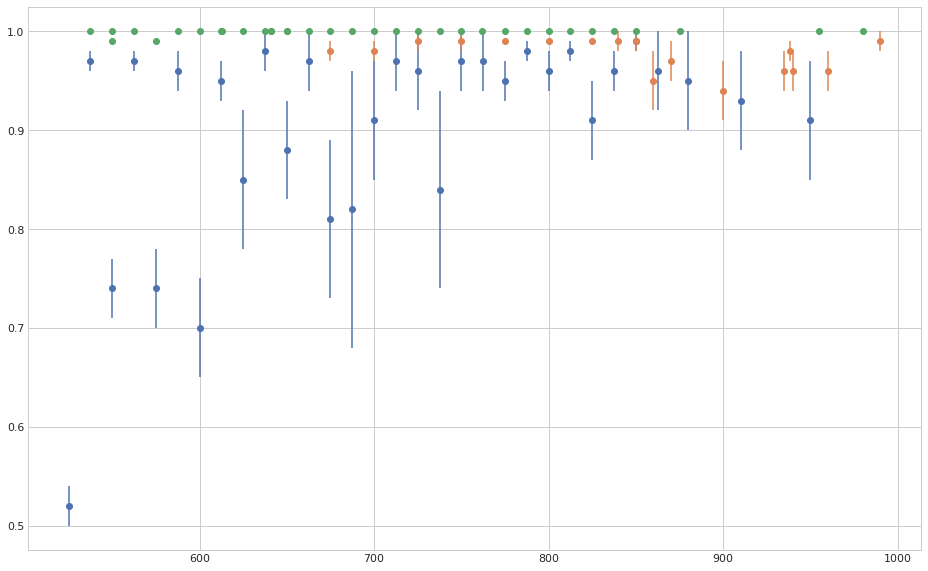

In [143]:
plt.errorbar(data=cs11, x=cs11.index, y='TrigEff', yerr='TrigErr', fmt='o')
plt.errorbar(data=cs17, x=cs17.index, y='TrigEff', yerr='TrigErr', fmt='o')
plt.errorbar(data=cs19, x=cs19.index, y='TrigEff', yerr='TrigErr', fmt='o')